# Working with images in Python

In [64]:
from skimage import data #library to work with Images Skimages
import numpy as np

cat = data.chelsea()
print('The size of the image is {}'.format(np.shape(cat)))


The size of the image is (300, 451, 3)


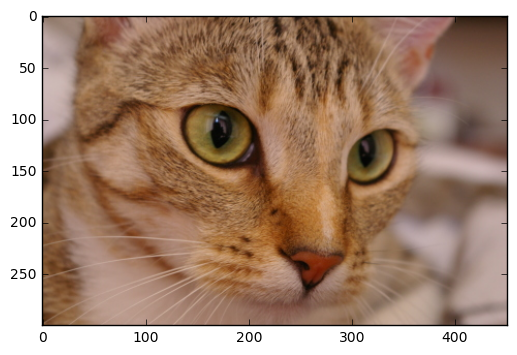

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
#show the image
plt.imshow(cat)

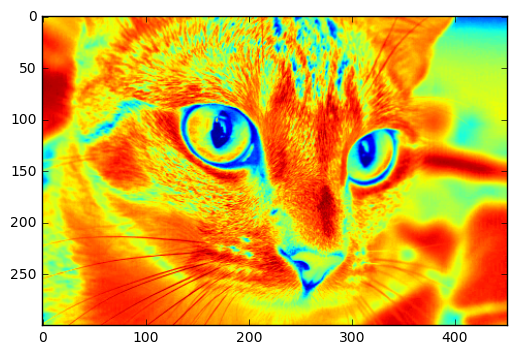

In [66]:
redComp = cat[:,:,0]
plt.imshow(redComp)

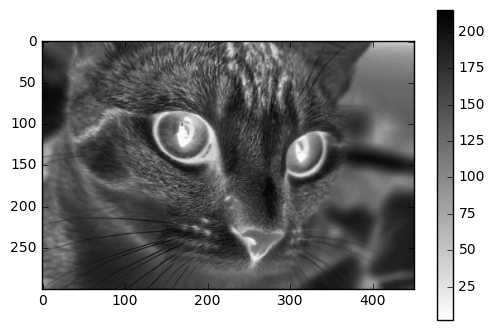

In [67]:
# using a different color representation
plt.imshow(redComp, cmap='binary')
plt.colorbar()

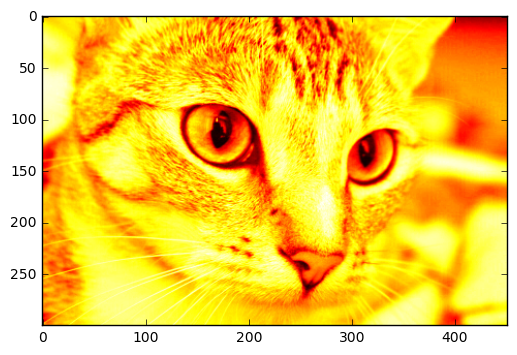

In [68]:
plt.imshow(redComp, cmap='hot')

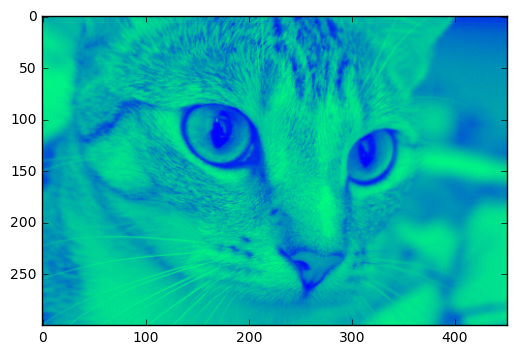

In [69]:
plt.imshow(redComp, cmap='winter')

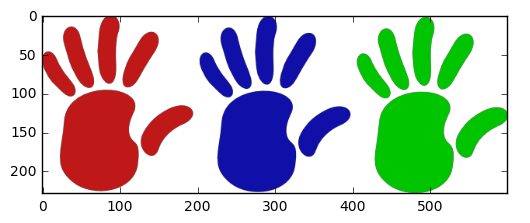

In [70]:
# how to read an image
import matplotlib.image as img

hand = img.imread('RedBlueGreen.png')
plt.imshow(hand)

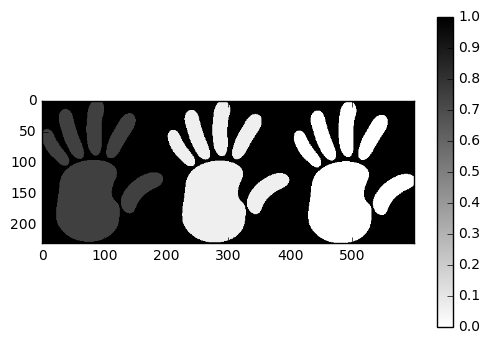

In [71]:
redComp = hand[:,:,0]
plt.imshow(redComp, cmap='binary')
plt.colorbar()

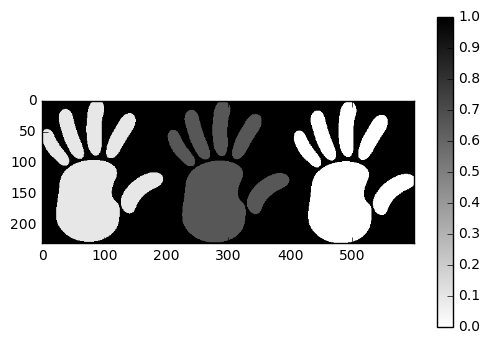

In [72]:
blueComp = hand[:,:,2]
plt.imshow(blueComp, cmap='binary')
plt.colorbar()

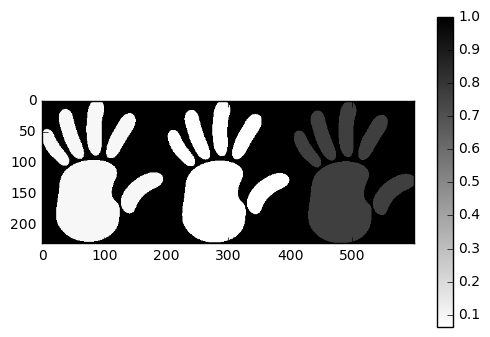

In [73]:
greenComp = hand[:,:,1]
plt.imshow(greenComp, cmap='binary')
plt.colorbar()

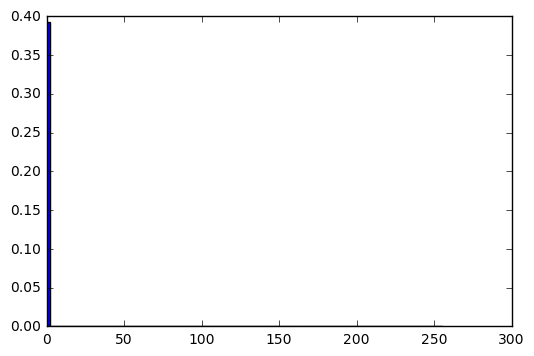

In [74]:
# histogram of an image
n,b,p=plt.hist(hand.ravel(), bins=100, range=(0,255), normed=True)

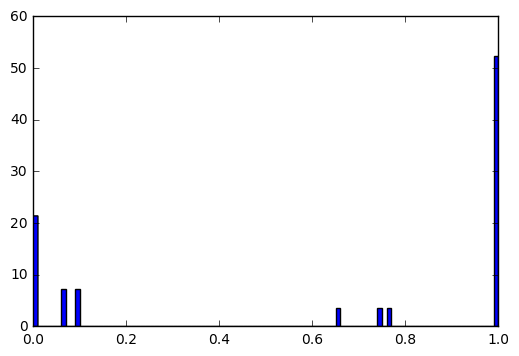

In [75]:
# let's improve the image by equalizing the histogram
from skimage import exposure

hand_equalize = exposure.equalize_hist(hand)
n,b,p=plt.hist(hand.ravel(), bins=100, range=(0,1), normed=True)

# DISNEY PHOTO HISTOGRAM

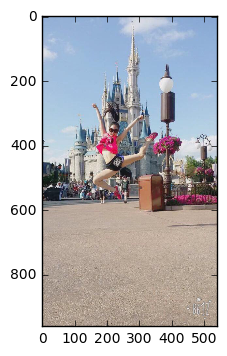

In [76]:
disney = img.imread('disney.jpg')
plt.imshow(disney)

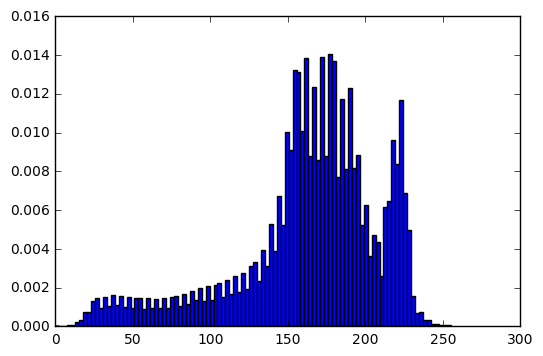

In [77]:
# histogram of the image "disney"
n,b,p=plt.hist(disney.ravel(), bins=100, range=(0,255), normed=True)

/Users/icicchen/anaconda/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


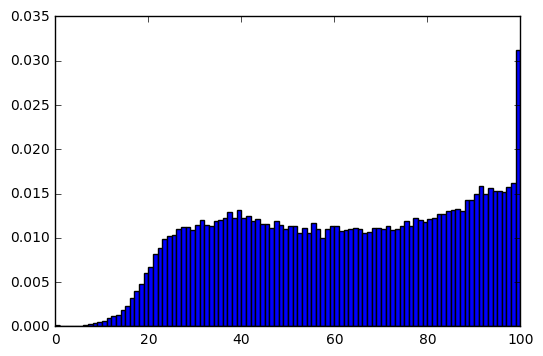

In [78]:
# let's improve the image by equalizing the histogram
from skimage import exposure

disney_equalize = exposure.equalize_hist(disney)
n,b,p=plt.hist(disney.ravel(), bins=100, range=(0,100), normed=True)

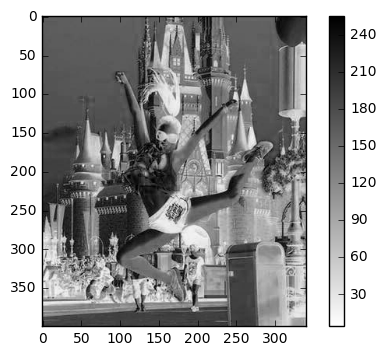

In [100]:
disney_crop = disney[200:600,60:400,0]
plt.imshow(disney_crop, cmap='binary')
plt.colorbar()
disney_row, disney_col, disney_colors = np.shape(disney)

In [101]:
# creating an image from a matrix
imageNorm = [[0,0.1,0.1,0], [0.1,0.5,0.5,0.1], [0.1,0.5,0.5,0.1], [0,0.1,0.1,0]]
print(imageNorm)

[[0, 0.1, 0.1, 0], [0.1, 0.5, 0.5, 0.1], [0.1, 0.5, 0.5, 0.1], [0, 0.1, 0.1, 0]]


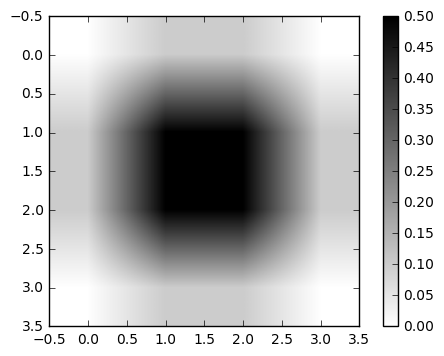

In [102]:
plt.imshow(imageNorm, cmap='binary')
plt.colorbar()

In [103]:
# creating an image from a matrix
imageNorm = [[0.6,], [0.1,0.5,0.5,0.1], [0.1,0.5,0.5,0.1], [0,0.1,0.1,0]]
print(imageNorm)

[[0.6], [0.1, 0.5, 0.5, 0.1], [0.1, 0.5, 0.5, 0.1], [0, 0.1, 0.1, 0]]


In [104]:
n=10
times = int(n/2)
odd_row = [0.6,0]*times
even_row = [0,0.6]*times
chess_pattern = [odd_row,even_row]*times
print(chess_pattern)

[[0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0], [0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6], [0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0], [0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6], [0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0], [0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6], [0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0], [0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6], [0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0], [0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6, 0, 0.6]]


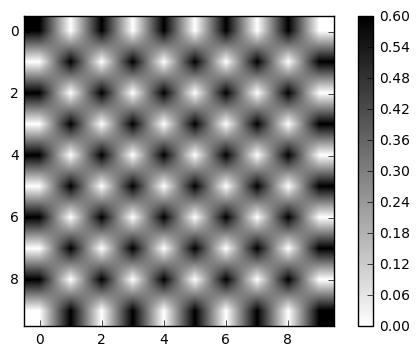

In [105]:
plt.imshow(chess_pattern, cmap='binary')
plt.colorbar()

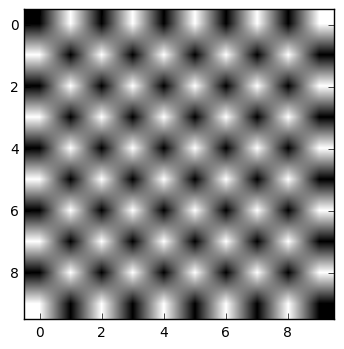

In [106]:
chess = [[0.6*(a%2==((b+1)%2==0)) for a in range(10)] for b in range(10)]
plt.imshow(chess,cmap='binary')

Size of matrix before transposing (3, 10, 10)
Size of matrix after trnasposing (3, 10, 10)


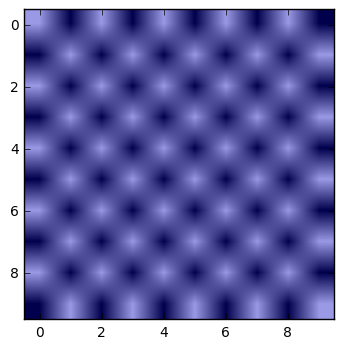

In [107]:
colChess = [chess, chess, np.add(chess,0.3)]
print('Size of matrix before transposing {}'.format(np.shape(colChess)))
colChessT = np.transpose(colChess)
print('Size of matrix after trnasposing {}'.format(np.shape(colChess)))

plt.imshow(colChessT)

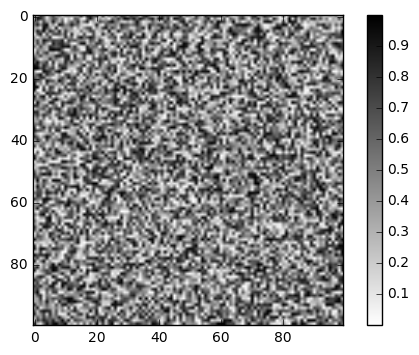

In [108]:
random = [[np.random.rand() for a in range(100)] for b in range(100)]
plt.imshow(random, cmap='binary')
plt.colorbar()

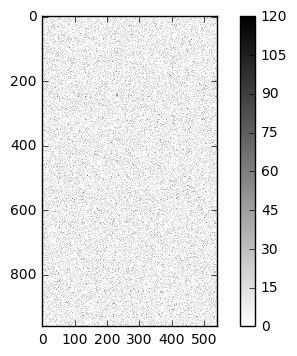

In [109]:
random = [[20*np.random.poisson(0.4) for a in range(disney_col)] for b in range(disney_row)]
plt.imshow(random, cmap='binary')
plt.colorbar()

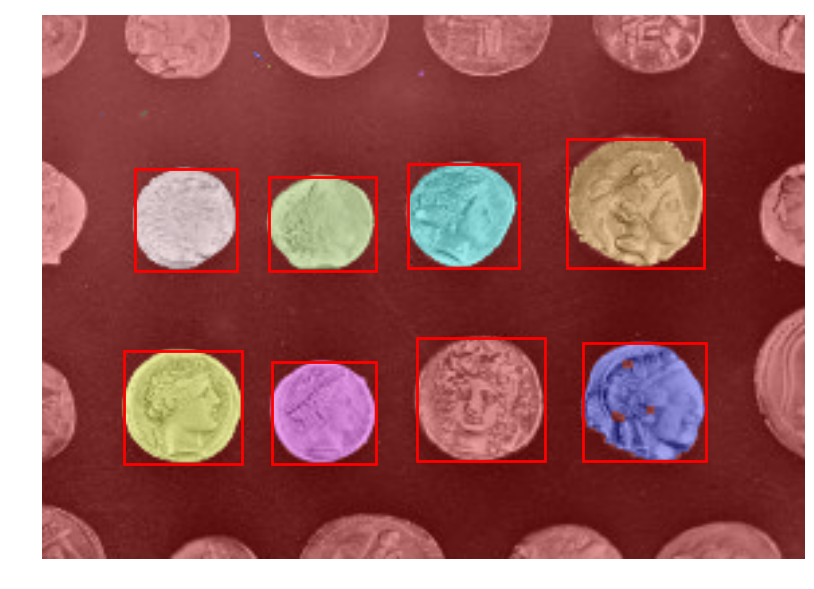

In [111]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()